<a href="https://colab.research.google.com/github/tasmia-azrine/T20-Cricket-Match-Prediction-Using-ML/blob/main/T20_Match_Predictor_%3B_A_Machine_Learning_Approach_to_Match_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***T20 Match Predictor ; A Machine Learning Approach to Match Outcome Prediction***


---






# **Introduction**

Predicting the outcome of sports matches, especially cricket, is a challenging task due to the influence of many factors such as player form, venue, weather, and tactical decisions like toss results. This project focuses on building machine learning models to predict the winner of Twenty20 (T20) international cricket matches using historical data from 2005 to 2023. By leveraging match-level features, the goal is to create a predictive model that can learn patterns from past matches and accurately forecast winners in future matches.

# **Dataset Description**

The dataset used for this project contains detailed information about all T20 international cricket matches played between 2005 and 2023. Each row in the dataset corresponds to one match, and it includes the following key columns:  

*  **Team1 Name and Team2 Name:**  The two competing teams.
*   **Match Venue (Country):**  The country where the match was played.
*   **Match Date:**  The date the match occurred.
*   **Toss Winner:**  The team that won the toss.
*   **Toss Winner Choice:**  Whether the toss winner chose to bat or field first.
*   **Team1 Runs Scored and Team2 Runs Scored:**  Runs scored by each team.
*   **Match Winner:**  The actual winner of the match.
*   **etc.**



>   **Source:** Kaggle — "All T20 Internationals (2005–2023) "    ----> [Each row represents a single T20 match.]




This dataset offers a rich set of categorical and numerical features necessary for predictive modeling. However, the data also required preprocessing to transform it into a format suitable for machine learning algorithms.

In [3]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("t20i_Matches_Data.csv")

df.head()

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [ ]:
# Show the column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name', 'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain', 'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec', 'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored', 'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)', 'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2', 'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner', 'Match Result Text', 'MOM Player', 'Team1 Playing 11', 'Team2 Playing 11', 'Debut Players']


# **Data Cleanning**

Before building predictive models, the dataset required careful cleaning and preprocessing to ensure accuracy and meaningful results. The initial raw data included various columns such as team names, match venues, toss winners, scores, and match winners.


Key steps in the data cleaning process included:

>  Handling Missing Values: Rows with missing or inconsistent data were examined and either cleaned or removed to avoid misleading the model.

> Keep Necessary Columns and Date Sorting: The matches were chronologically sorted by the match date to maintain a realistic temporal order, ensuring that future matches were predicted based on historical data only.

> Feature Engineering: New features such as Team Average Score, Home Advantage and Toss Advantage were created to capture important match dynamics that could influence the outcome.


This rigorous data cleaning and transformation phase was essential to maximize the quality of inputs, thereby improving model learning and generalization.

In [ ]:
# Keep only the important columns
important_columns = [
    'Match Date', 'Team1 Name', 'Team2 Name',
    'Team1 Runs Scored', 'Team2 Runs Scored',
    'Toss Winner', 'Toss Winner Choice', 'Match Venue (Country)', 'Match Winner'
]

df = df[important_columns]

# Show the first 10 rows
df.head(10)


,Match Date,Team1 Name,Team2 Name,Team1 Runs Scored,Team2 Runs Scored,Toss Winner,Toss Winner Choice,Match Venue (Country),Match Winner
0,2008-02-01,India,Australia,74.0,75.0,India,bat,Australia,Australia
1,2008-02-07,England,New Zealand,193.0,143.0,England,bat,New Zealand,England
2,2008-08-04,Scotland,Netherlands,107.0,110.0,Netherlands,bowl,Ireland,Netherlands
3,2008-08-04,Kenya,Scotland,106.0,107.0,Kenya,bat,Ireland,Scotland
4,2008-10-10,Zimbabwe,Sri Lanka,106.0,107.0,Sri Lanka,bowl,Canada,Sri Lanka
5,2008-10-10,Pakistan,Canada,137.0,102.0,Pakistan,bat,Canada,Pakistan
6,2008-10-12,Zimbabwe,Pakistan,107.0,110.0,Zimbabwe,bat,Canada,Pakistan
7,2008-10-13,Zimbabwe,Canada,184.0,75.0,Canada,bowl,Canada,Zimbabwe
8,2008-10-13,Pakistan,Sri Lanka,132.0,133.0,Sri Lanka,bowl,Canada,Sri Lanka
9,2008-11-05,South Africa,Bangladesh,118.0,109.0,Bangladesh,bowl,South Africa,South Africa


In [ ]:
# Check how many missing values (nulls) are in each column
df.isnull().sum()

,0
Match Date,11
Team1 Name,0
Team2 Name,0
Team1 Runs Scored,13
Team2 Runs Scored,50
Toss Winner,1
Toss Winner Choice,10
Match Venue (Country),0
Match Winner,98


In [ ]:
# Drop rows where any of the important columns are missing
df = df.dropna(subset=[
    'Toss Winner',
    'Toss Winner Choice',
    'Match Winner'
])
# Double check again
df.isnull().sum()


,0
Match Date,10
Team1 Name,0
Team2 Name,0
Team1 Runs Scored,1
Team2 Runs Scored,2
Toss Winner,0
Toss Winner Choice,0
Match Venue (Country),0
Match Winner,0


# Exploratory Data Analysis (EDA)

---
To gain insights into the data and identify factors influencing match outcomes, several analyses and visualizations were performed.



### **Bar Chart of Wins by [Teams Winning Match]**
This visualization showing wins of each team against opponents teams. This gave insight into team performance against opponents.



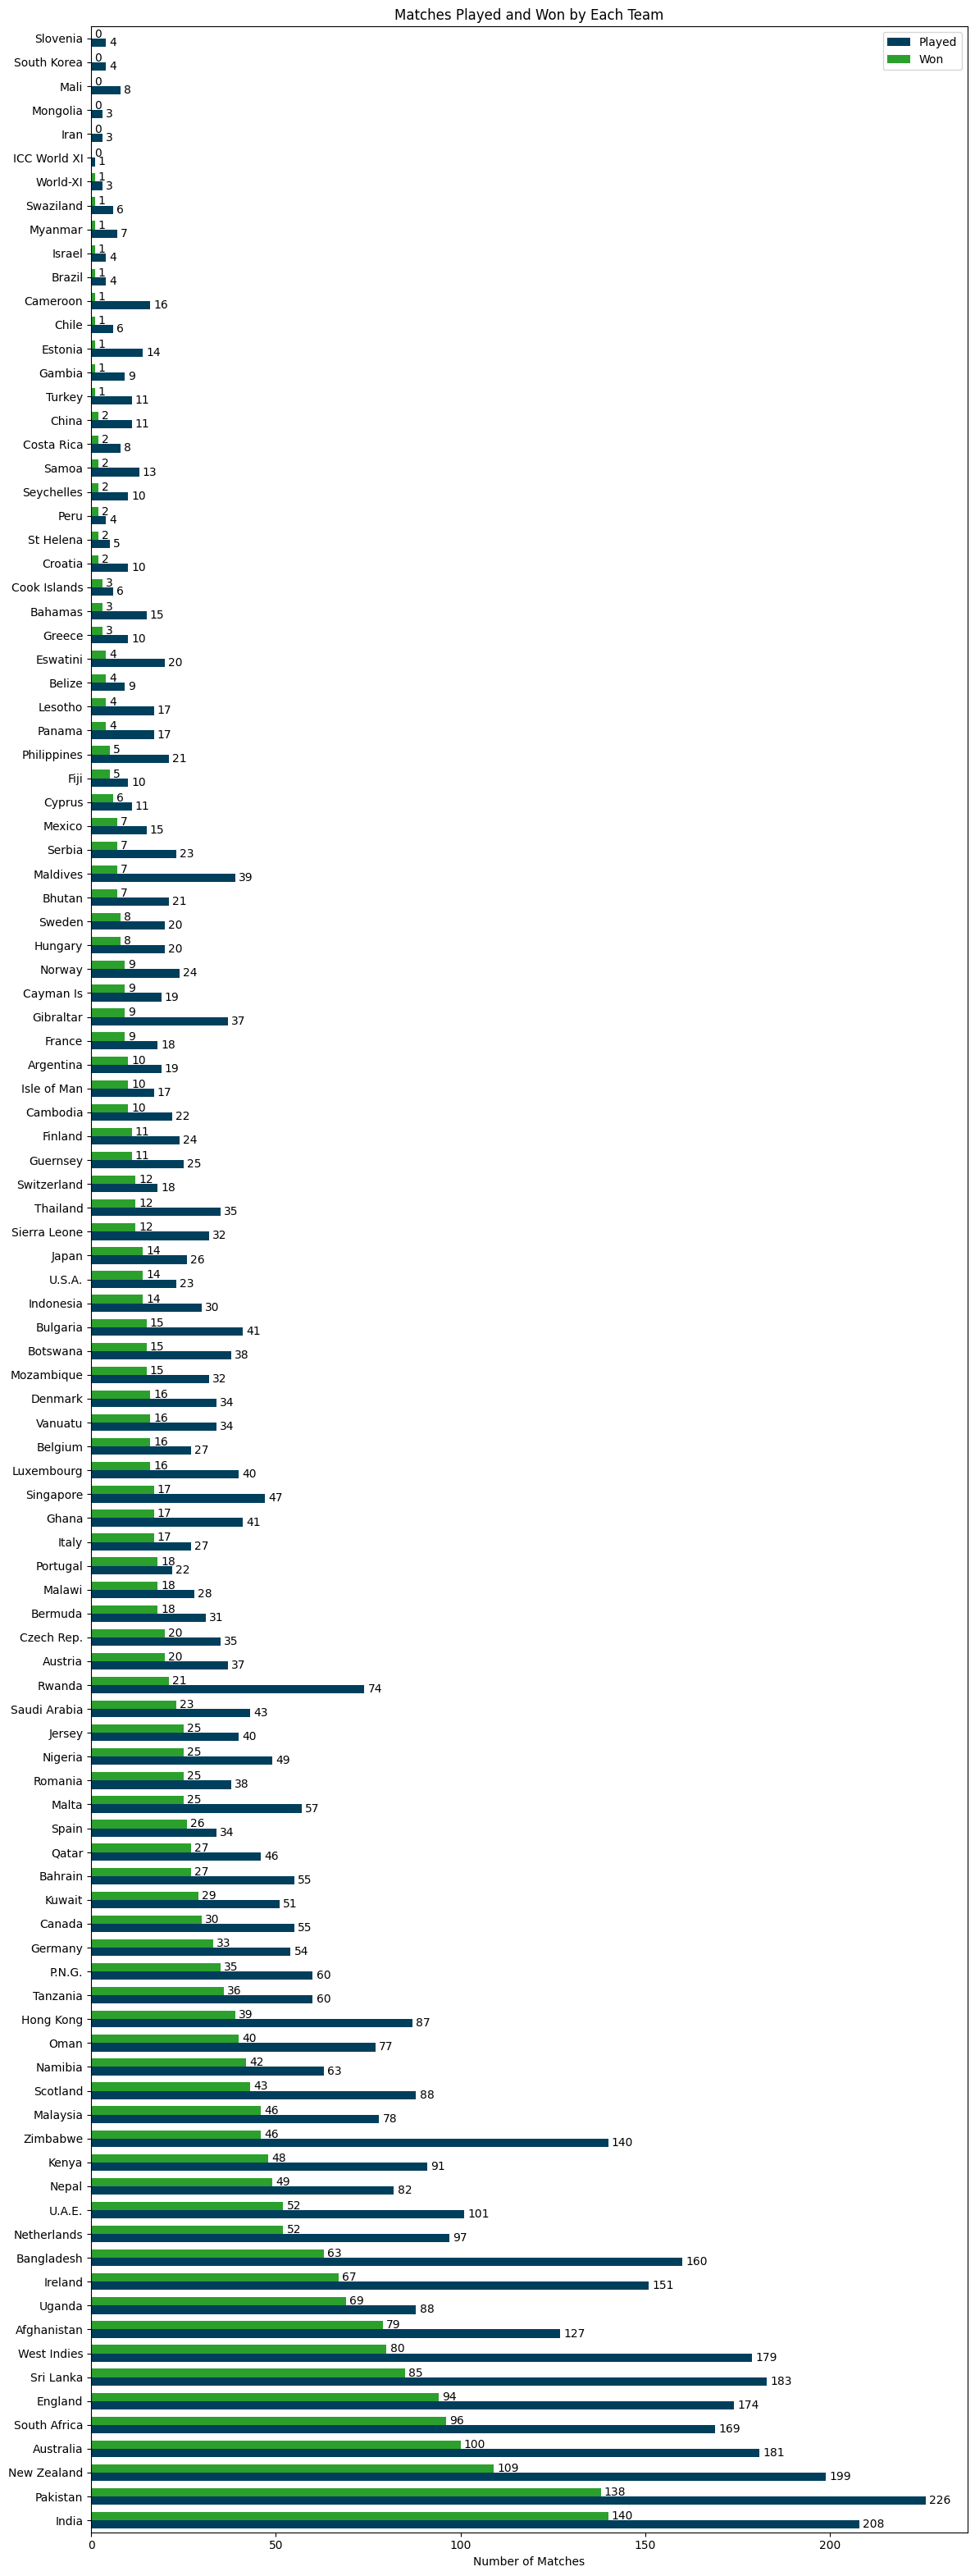

In [ ]:
# Count matches played and won
teams_played = pd.concat([df['Team1 Name'], df['Team2 Name']])
played_counts = teams_played.value_counts()
win_counts = df['Match Winner'].value_counts()

# Create DataFrame
team_stats = pd.DataFrame({'Played': played_counts, 'Won': win_counts}).fillna(0).astype(int)
team_stats = team_stats.sort_values('Won', ascending=False)

# Bar positions
teams = team_stats.index
y = np.arange(len(teams))
height = 0.35

# Values
played = team_stats['Played'].values
won = team_stats['Won'].values

# Plot bars
fig, ax = plt.subplots(figsize=(12, 0.3 * len(teams)))
bars1 = ax.barh(y - height/2, played, height=height, color='#003f5c', label='Played')
bars2 = ax.barh(y + height/2, won, height=height, color='#2ca02c', label='Won')

# Add labels
ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

# Set labels and legend
ax.set_yticks(y)
ax.set_yticklabels(teams)
ax.set_ylim(-0.5, len(teams) - 0.5)
ax.set_xlabel("Number of Matches")
ax.set_title("Matches Played and Won by Each Team")
ax.legend()
plt.tight_layout()
plt.show()


### **Number of Matches Played in Country Venue**

A contingency graph was created to show the number of matches played in a specific country venue.

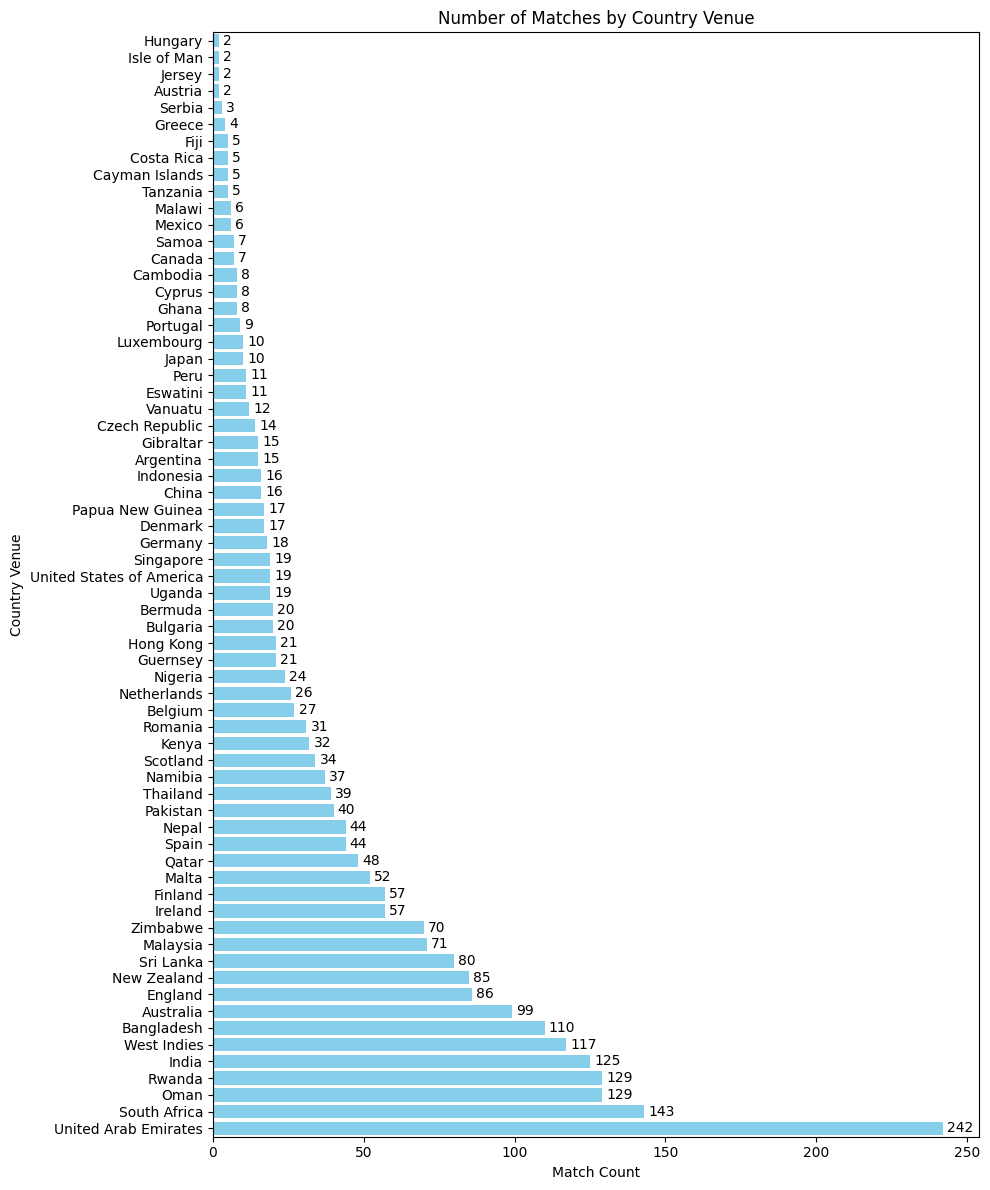

In [ ]:
# Count matches by country
country_counts = df['Match Venue (Country)'].value_counts()

# Plot
plt.figure(figsize=(10, 12))
bars = plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.title("Number of Matches by Country Venue")
plt.xlabel("Match Count")
plt.ylabel("Country Venue")

# Add count labels
plt.bar_label(bars, padding=3)

plt.ylim(-0.5, len(country_counts) - 0.5)
plt.tight_layout()
plt.show()


### **Matrix of Wins by [Team x Country]**
A contingency matrix was created to show the number of matches each team won in different countries. This matrix helped visualize the home and away performance of teams and identify if teams tend to perform better in certain countries. Understanding location-based performance patterns helps quantify home advantage, which can be a significant factor in match outcomes due to familiar pitch conditions

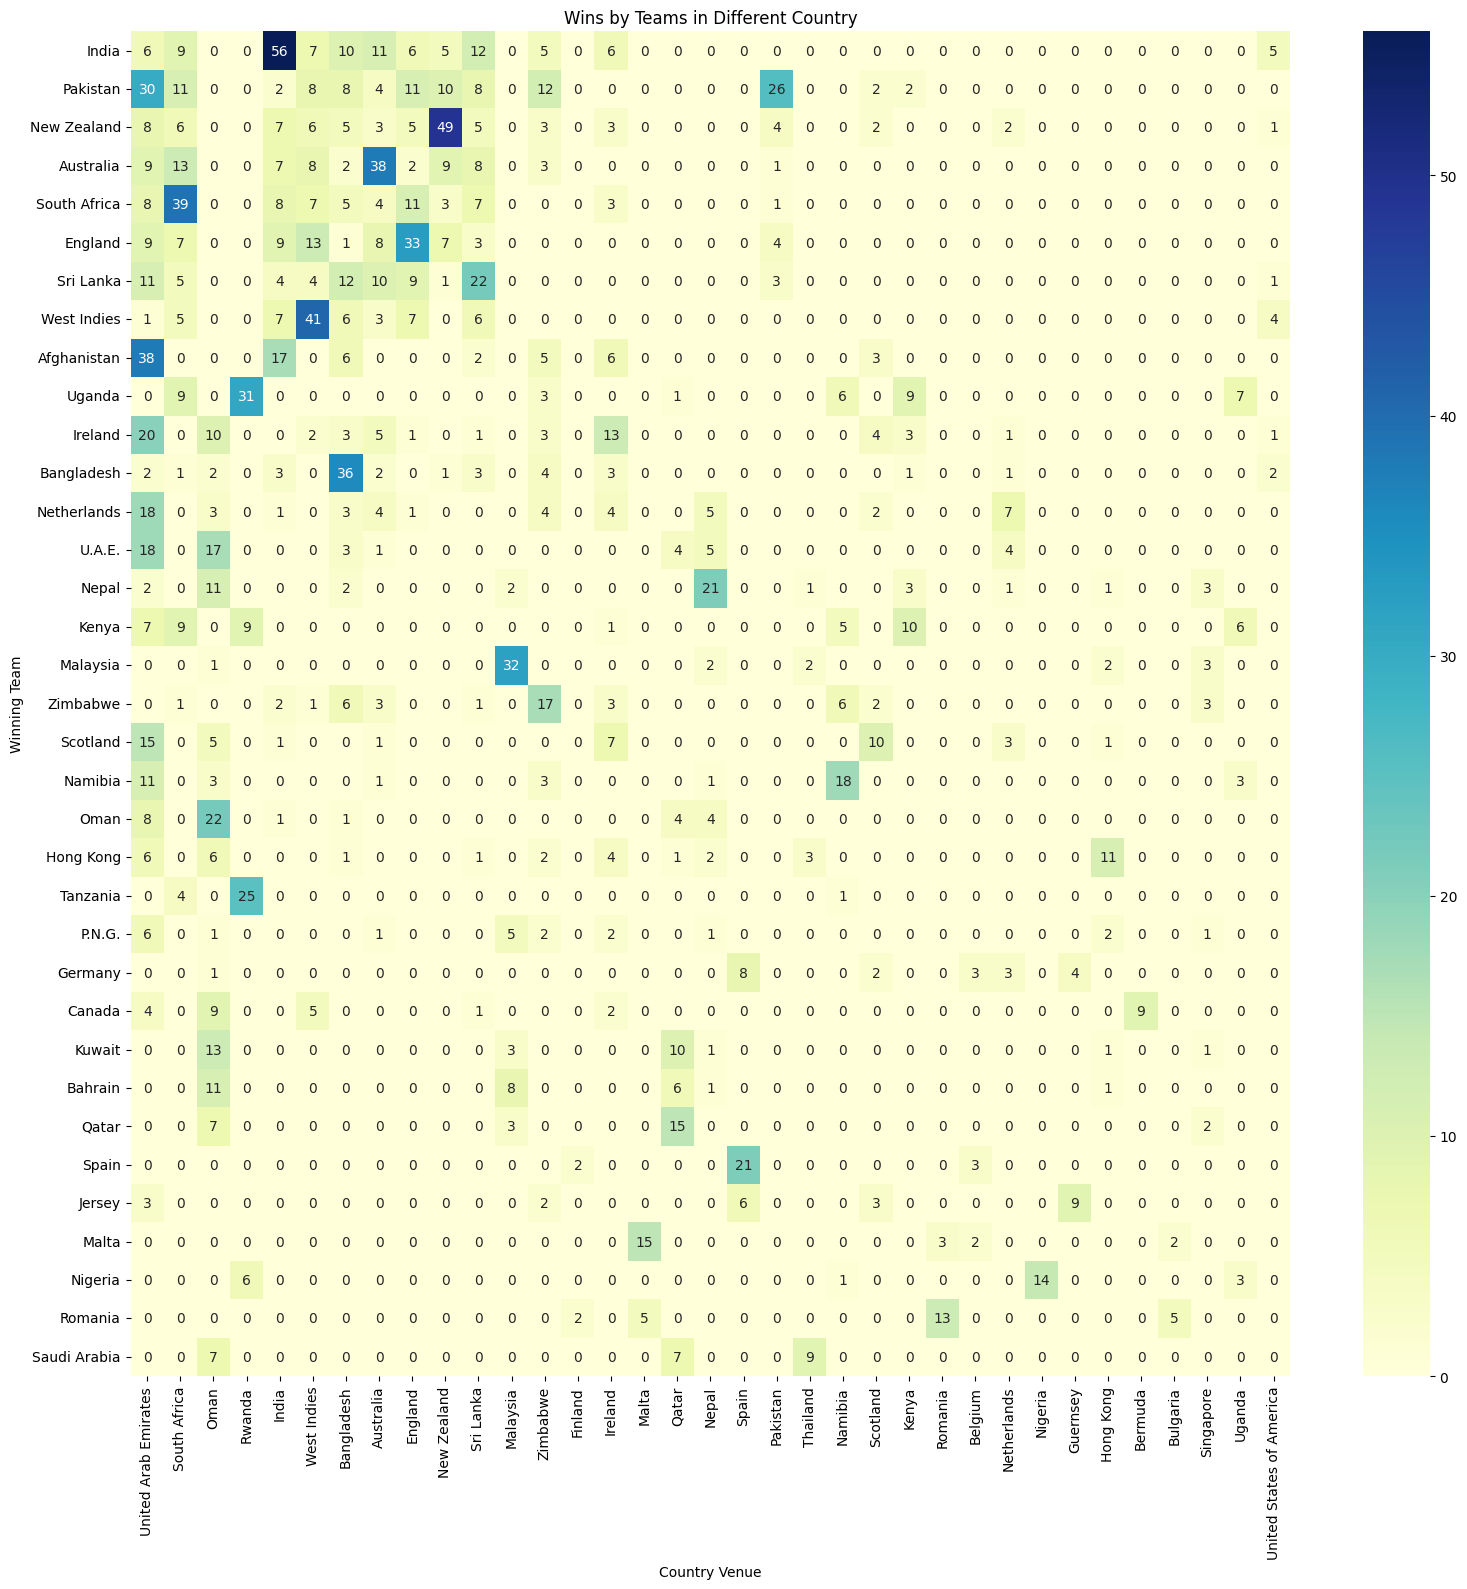

In [ ]:
# Create a matrix of wins by [team x country]
team_Country_matrix = pd.crosstab(df['Match Winner'], df['Match Venue (Country)'])

# Only use top teams and countries
top_teams = team_Country_matrix.sum(axis=1).nlargest(35).index
top_Country = team_Country_matrix.sum(axis=0).nlargest(35).index
filtered_matrix = team_Country_matrix.loc[top_teams, top_Country]

plt.figure(figsize=(16, 16))
sns.heatmap(filtered_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Wins by Teams in Different Country")
plt.xlabel("Country Venue")
plt.ylabel("Winning Team")
plt.tight_layout()
plt.show()


### **Toss Choice Distribution**
A pie chart was created to illustrate the distribution of toss choices — whether the toss-winning team decided to bat or field first. The toss decision reflects a critical strategic choice.

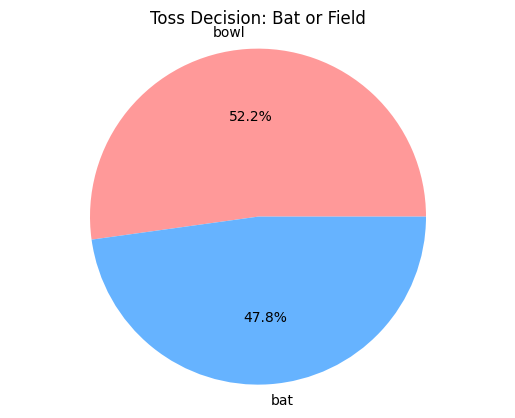

In [ ]:
# Count toss choices
toss_counts = df['Toss Winner Choice'].value_counts()

# Use raw labels directly
toss_labels = toss_counts.index

# Plot
plt.pie(toss_counts, labels=toss_labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title("Toss Decision: Bat or Field")
plt.axis('equal')
plt.show()

### **Does Winning the Toss Help Win the Match?**
An analysis was conducted to determine the correlation between winning the toss and winning the match. This was visualized using bar charts comparing the proportion of matches won by teams that won the toss versus those that lost it. The toss can influence the outcome by allowing the toss-winning captain to choose an advantageous batting or fielding position. Quantifying this effect clarifies whether the toss is a strong predictor of match results, and thus justifies including Toss Advantage as a feature in the model.

<ipython-input-176-366066599>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Lost Match After Toss Win', 'Won Match After Toss Win'],


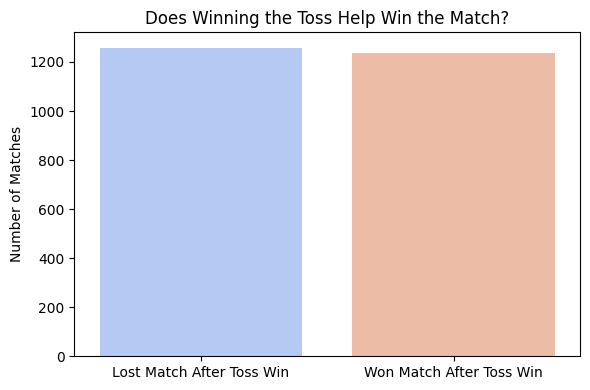

In [ ]:
toss_effect = (df['Toss Winner'] == df['Match Winner']).value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Lost Match After Toss Win', 'Won Match After Toss Win'],
            y=toss_effect.values,
            palette='coolwarm')
plt.title("Does Winning the Toss Help Win the Match?")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()


# **Data Preprocessing and Feature Engineering**
### **Handling Categorical Variables**
Since machine learning models work primarily with numerical inputs, categorical variables such as team names and toss choices needed encoding. **Label Encoding** was used to convert team names and other categorical features into integer labels. Additionally, **One-Hot Encoding** was applied to represent categorical variables as binary features, allowing models to better interpret team-specific effects.

### **Creation of New Features**
Two important engineered features were introduced to enhance model performance:

1.   **Home Advantage:**
      
    This feature captures whether a team is playing on its home ground, which is often a significant advantage in sports. It is calculated as +1 if Team1 is playing in their own country, -1 if Team2 is, and 0 otherwise.
2.   **Toss Advantage:**

    Winning the toss can provide a tactical advantage. This feature indicates which team won the toss: +1 if Team1 won, -1 if Team2 won.



> **Additional Experiment: Average Team Scores Feature (Team1_Avg_Score and Team2_Avg_Score)** were implemented to reflect the historical batting strength by each team in previous matches with Team1 Runs Scored and Team2 Runs Scored. For the training data, expanding means of runs scored were calculated, ensuring that only past matches contributed to the average, thus preventing data leakage. For the test data, averages from the training set were used. However, after testing, I observed that models like Logistic Regression and Gradient Boosting performed better without these features. It uses past match data only within training. For new teams in testing, I filled with previous mean, which may confuse the model.

In [ ]:
# Adding additional features for better tranning

# Home Advantage Feature
# Home Advantage: +1 for Team1 home, -1 for Team2 home, 0 for None
df['Home Advantage'] = (
    (df['Team1 Name'] == df['Match Venue (Country)']).astype(int) -
    (df['Team2 Name'] == df['Match Venue (Country)']).astype(int)
)

# Toss Advantage Feature
# Toss Advantage: +1 if Team1 won the toss, -1 if Team2 won the toss
df['Toss Advantage'] = (
    (df['Toss Winner'] == df['Team1 Name']).astype(int) -
    (df['Toss Winner'] == df['Team2 Name']).astype(int)
)

# Use one encoder for all team-related columns
team_encoder = LabelEncoder()

# Fit using all teams together (to get all possible teams)
all_teams = pd.concat([
    df['Team1 Name'],
    df['Team2 Name'],
    df['Match Winner']
], axis=0)

team_encoder.fit(all_teams)

# Now apply to each team column
df['Team1 Name'] = team_encoder.transform(df['Team1 Name'])
df['Team2 Name'] = team_encoder.transform(df['Team2 Name'])
df['Match Winner'] = team_encoder.transform(df['Match Winner'])

# Separate encoder for Toss Choice (bat/field)
toss_choice_encoder = LabelEncoder()
df['Toss Winner Choice'] = toss_choice_encoder.fit_transform(df['Toss Winner Choice'])

# **Training Process**
The dataset was split into training and testing subsets based on match dates to mimic real-world conditions where future matches are predicted based on past data. Approximately 80% of the data was used for training and the remaining 20% for testing.

The features selected for model input included encoded team names, toss winner choice, home and toss advantages, and average team scores. One-hot encoding was applied to categorical features to ensure compatibility with the models.

In [ ]:
df = df.drop(['Match Date','Team1 Runs Scored', 'Team2 Runs Scored', 'Toss Winner', 'Match Venue (Country)'], axis=1) # No need for model tranning

# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Team1 Name', 'Team2 Name', 'Toss Winner Choice'], drop_first=True)

# Split the dataset
# features = 'Team1 Name', 'Team2 Name', 'Toss Winner Choice', 'Match Winner', 'Home Advantage', 'Toss Advantage'
X = df.drop(['Match Winner'], axis=1)
y = df['Match Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head(100)

,Match Winner,Home Advantage,Toss Advantage,Team1 Name_1,Team1 Name_2,Team1 Name_3,Team1 Name_4,Team1 Name_5,Team1 Name_6,Team1 Name_7,...,Team2 Name_96,Team2 Name_97,Team2 Name_98,Team2 Name_99,Team2 Name_100,Team2 Name_101,Team2 Name_102,Team2 Name_103,Team2 Name_104,Toss Winner Choice_1
0,2,-1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,26,-1,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,65,0,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,81,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,90,0,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,90,0,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
103,41,0,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
104,66,0,-1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
105,102,0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# **Model Selection**
Four machine learning models were selected for training and evaluation based on their popularity and suitability for classification tasks:

1.   **Logistic Regression:** A simple linear model that is easy to interpret and effective for binary and multiclass classification. It applies the logistic (sigmoid) function to estimate probabilities.
    
          Model: y = sigmoid(w₁x₁ + w₂x₂ + ... + wₙxₙ + b)

2.   **Decision Tree:** A tree-based model that splits data by features to make predictions, capturing non-linear relationships.

          Root Node: Best feature selected using Gini impurity or entropy.
          Internal Nodes: Further splits using thresholds.
          Leaf Nodes: Predicted winner (class).

3. **K-Nearest Neighbors (KNN):**
        It is a non-parametric, instance-based learning algorithm.
        It finds the K most similar matches from training data based on input features.
        Then it votes among those matches to predict the winner.
        No actual training happens — it just stores the data and compares.

4.   **Random Forest:** An ensemble of decision trees that improves accuracy by reducing overfitting.
          
          Multiple decision trees built on random subsets of data and features.

5.   **Gradient Boosting:** An ensemble boosting method that builds models sequentially to correct previous errors, often yielding high accuracy.

          Step 1: Train a small tree (weak learner).
          Step 2: Compute the error.
          Step 3: Train a new tree on that error.
          Repeat for many iterations.
          Final prediction: Weighted sum of all trees' outputs.

These models represent a range from simpler to more complex algorithms, providing a robust basis for comparison. Each model was trained using default hyperparameters initially to establish baseline performance. Training involved fitting the models to the training data and learning patterns associated with match outcomes.

In [ ]:
# Define all models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔷 {name}")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions, zero_division=0))



🔷 Logistic Regression
Accuracy: 0.6152304609218436
              precision    recall  f1-score   support

           0       0.11      0.06      0.07        18
           1       0.33      1.00      0.50         1
           2       0.53      0.45      0.49        20
           3       0.83      0.71      0.77         7
           5       1.00      0.12      0.22         8
           6       0.64      0.44      0.52        16
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         1
          11       0.50      0.25      0.33         4
          13       0.67      1.00      0.80         2
          14       0.80      1.00      0.89         4
          16       0.67      1.00      0.80         2
          17       1.00      0.50      0.67         2
          20       0.00      0.00      0.00         1
          21       0.00      

# **Evaluation Metrics**
Model performance was primarily evaluated using accuracy, which measures the proportion of correctly predicted match winners out of all matches in the test set. Additionally, classification reports including precision, recall, and F1-score were generated to provide more detailed insights into the performance per class (team).

Due to the large number of teams in the dataset, confusion matrices were generated only for the top **35 teams** to maintain readability and provide focused insights into model predictions among the most frequent teams.

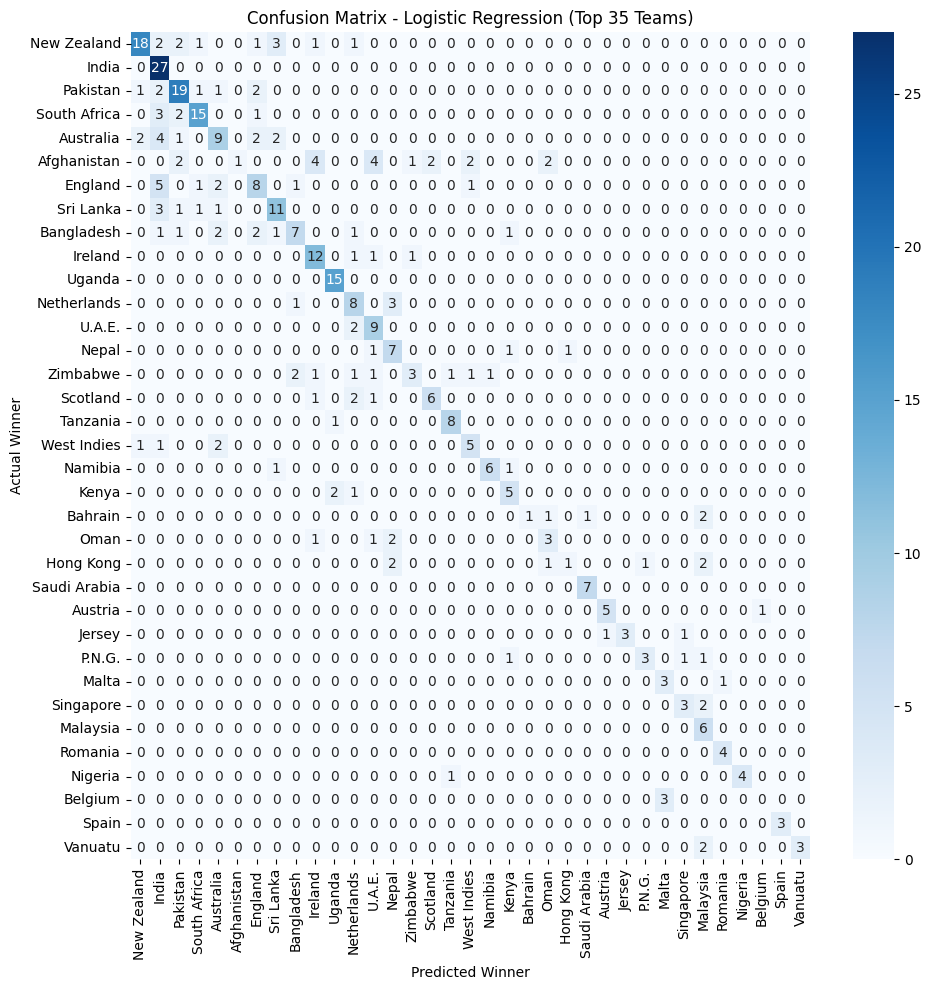

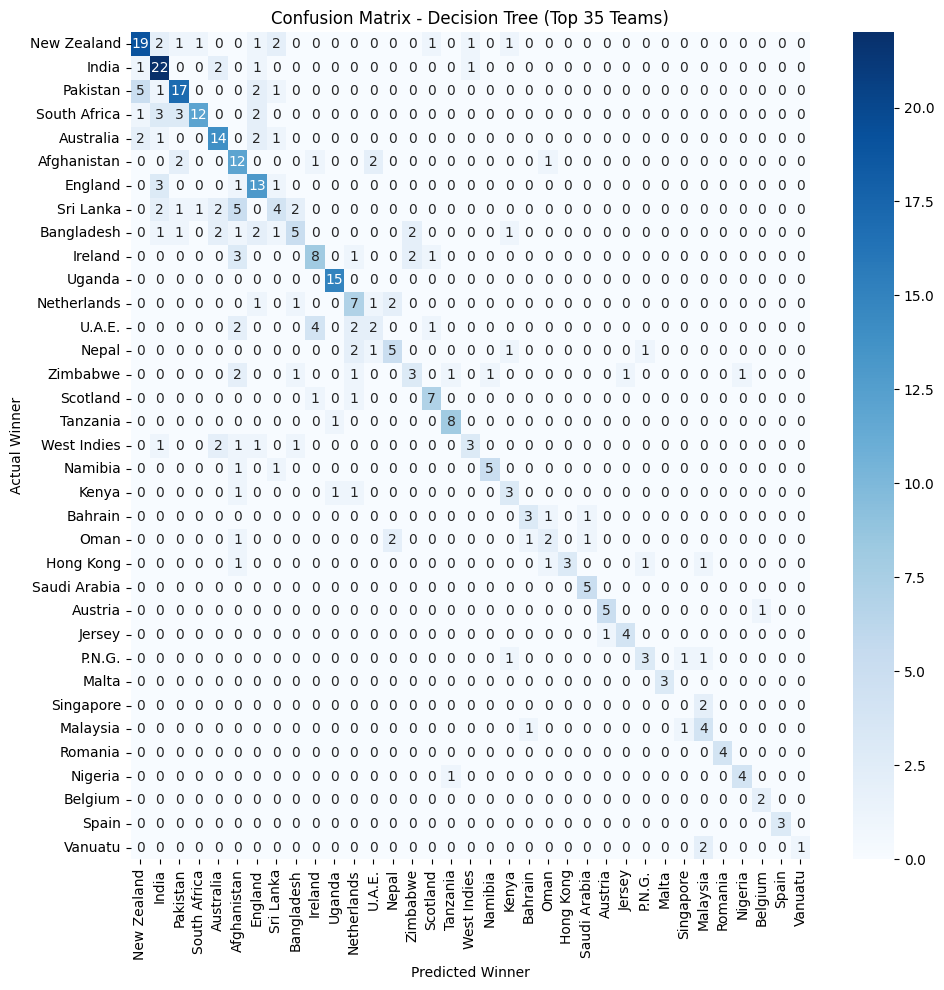

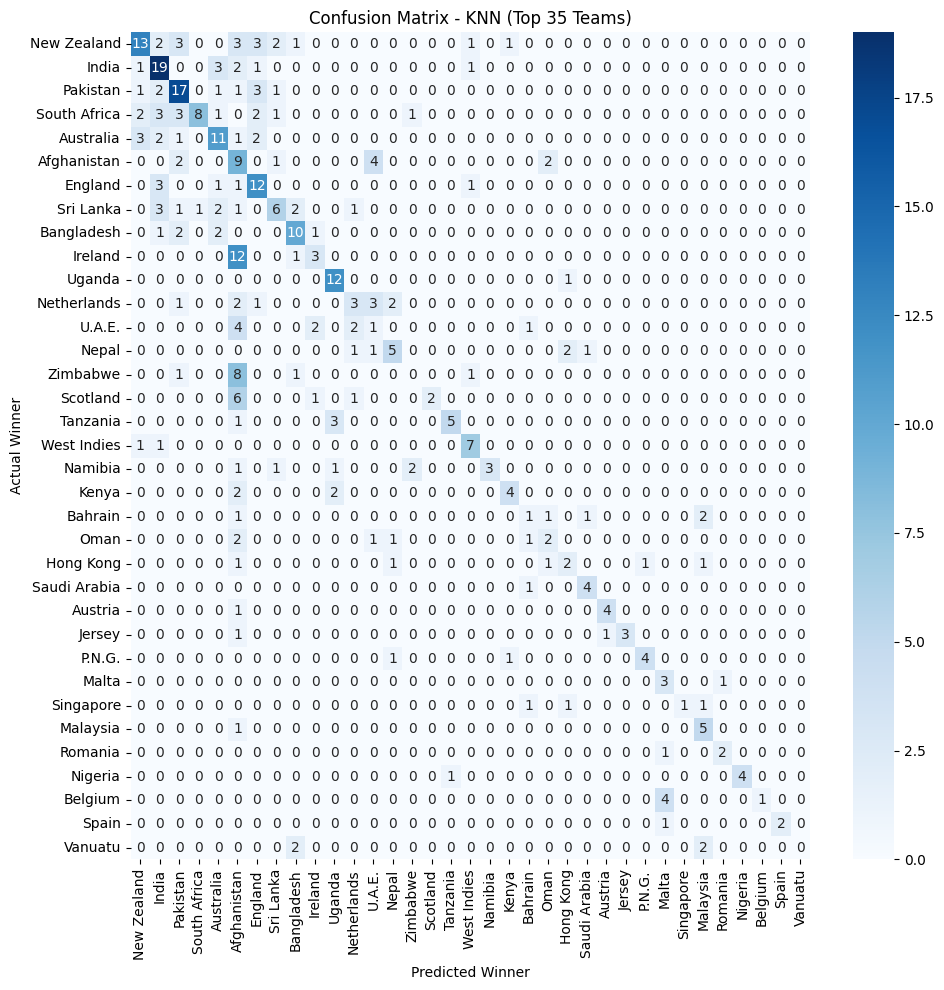

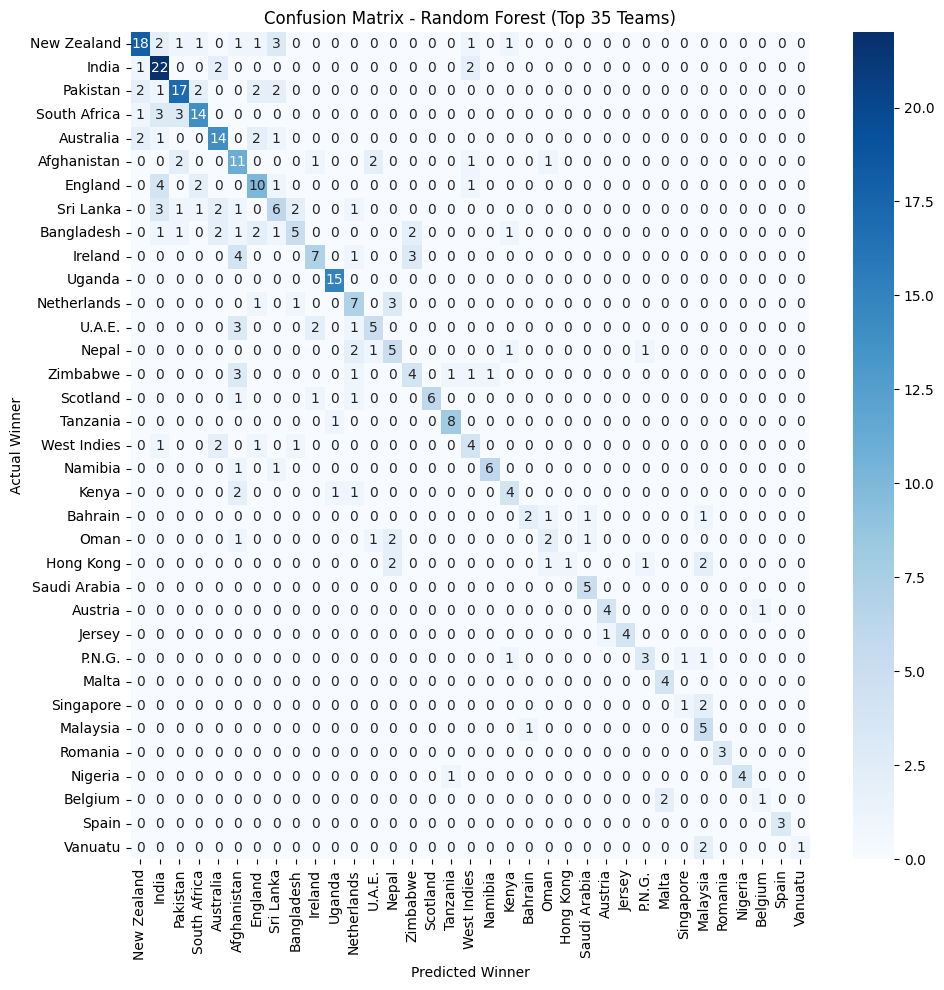

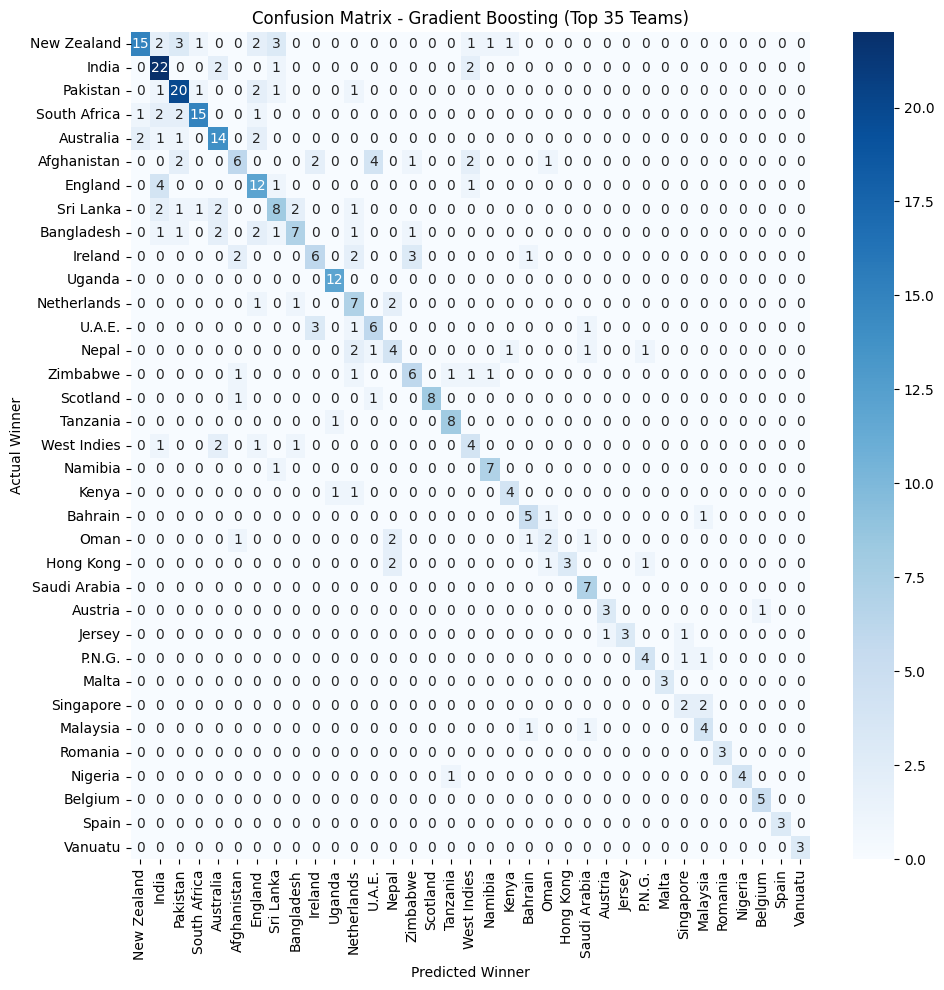

In [ ]:
# Convert encoded labels to original team names
actual_names = team_encoder.inverse_transform(y_test)

# Get top 35 most frequent teams in test set
top_teams = pd.Series(actual_names).value_counts().nlargest(35).index.tolist()

for name, model in models.items():

    print(' ')

    # Predict using the model
    predictions = model.predict(X_test)
    predicted_names = team_encoder.inverse_transform(predictions)

    # Filter for top 35 teams only
    mask = pd.Series(actual_names).isin(top_teams)
    actual_top = pd.Series(actual_names)[mask]
    predicted_top = pd.Series(predicted_names)[mask]

    # Create confusion matrix
    cm = confusion_matrix(actual_top, predicted_top, labels=top_teams)

    # Plot
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=top_teams, yticklabels=top_teams)
    plt.xlabel('Predicted Winner')
    plt.ylabel('Actual Winner')
    plt.title(f'Confusion Matrix - {name} (Top 35 Teams)')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**
To improve model performance, hyperparameter tuning using GridSearchCV with cross-validation can be performed. This process systematically searches through predefined parameter grids to find the best model configuration, further boosting accuracy and robustness. Although this process did not consistently increase accuracy across all models for this project, it was a valuable experiment that helped evaluate model robustness.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs'],
            'max_iter': [500, 1000, 2000]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 4, 6, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'max_features': ['sqrt'],
            'min_samples_split': [2, 4],
            'bootstrap': [True, False]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}
# Run GridSearchCV for each model
for name, mp in model_params.items():
    print(f"\n🔹 {name}")
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best params:", grid.best_params_)
    print("Best score:", grid.best_score_)


🔹 Logistic Regression
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
Best score: 0.6078305704019084

🔹 Decision Tree
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.5536589968898149

🔹 Random Forest
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}
Best score: 0.5937834042938671

🔹 Gradient Boosting
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.5832555787058006


# **Experimental Result**

| Model               | Accuracy (Before Tuning) | Accuracy (After Tuning) | Notes                                                 |
|---------------------|--------------------------|--------------------------|--------------------------------------------------------|
| Logistic Regression | 62%                      | 61%                      | Slightly droped ; Good performance overall    |
| Decision Tree       | 58%                      | 55%                      | Droped |
| K-Nearest Neighbors | 44%                      | Not tuned                | -        |:
| Random Forest       | 59%                      | 59%                      | Stable but tuning didn’t improve accuracy              |
| Gradient Boosting   | 60%                      | 59%                      | Slightly dropped after tuning   |




# **Conclusion**
This project demonstrates that machine learning can effectively predict T20 cricket match outcomes using match-level features such as team identities, toss results, home advantage, and historical team performance. **Logistic Regression** among the models tested, provides the best predictive performance.

Future work could include integrating player-level statistics, weather conditions, ball-by-ball engineering and more granular match events to improve prediction accuracy. Additionally, more sophisticated models like deep learning could be explored for capturing complex dependencies.